<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/PreTrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

Wed Apr 24 11:25:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   45C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
#! nvidia-smi

In [14]:
#!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
Current_dir = os.getcwd()
Current_dir

'/content'

In [19]:
path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis/data'

In [21]:
data_dir='data'
os.listdir(data_dir)

['Sample_images', 'Ads']

In [22]:
#os.listdir(os.path.join(data_dir,'Ads'))

In [23]:
imgTest= cv2.imread(os.path.join('data','Ads','converted_iframe_9_AD.jpg'))

In [24]:
type(imgTest)

numpy.ndarray

In [25]:
#imgTest.shape

In [26]:
#plt.imshow(imgTest)

In [27]:
#plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
#plt.show()

# Load Data

In [28]:
#tf.data.Dataset??

In [29]:
#tf.keras.utils.audio_dataset_from_directory??

In [30]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 15084 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()


In [32]:
batch=data_iterator.next()


In [33]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [34]:
batch[0].shape # images are numpy arrays

(32, 256, 256, 3)

In [35]:
batch[1] # labels

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

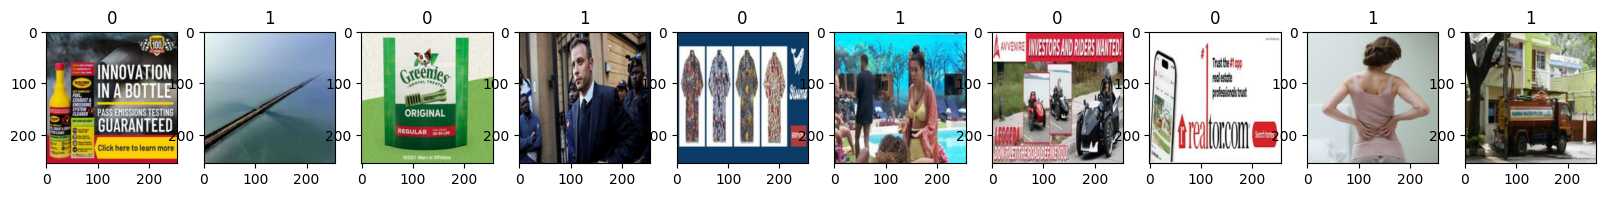

In [36]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [37]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [38]:
#batch[0] / 255

In [39]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [40]:
#scaled.as_numpy_iterator().next()

In [41]:
scaled_iterator=scaled.as_numpy_iterator()

In [42]:
batch = scaled_iterator.next()

In [43]:
batch[0].max()

1.0

In [44]:
#scaled.as_numpy_iterator().next()

# Split Data

In [45]:
#len(scaled)
len(data)

472

In [46]:
train_size = int(len(scaled)*.7)# batch size 32
val_size = int(len(scaled)*.2) #
test_size = int(len(scaled)*.1) #

In [47]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 330, Val Size:94, Test Size: 47


In [48]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [49]:
#train.as_numpy_iterator().next()[0]

In [50]:
#batch[0]

In [51]:
len(train)

330

# Model

In [52]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout, BatchNormalization
# from keras.optimizers import SGD, RMSprop, Adam, Adagrad

In [53]:
#SEED = 42 # to always get same dropout and shuffle

In [54]:
# def allcnn(weights=None):
#     model = Sequential()
#     model.add(Conv2D(32, (3,3), 1, padding = 'same', activation='relu', input_shape=(256,256,3)))
#     model.add(MaxPooling2D())
#     model.add(BatchNormalization())
#     #model.add(Dropout(0.2, seed=SEED))

#     model.add(Conv2D(64, (3,3), 1, padding = 'same', activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(BatchNormalization())
#     #model.add(Dropout(0.2, seed=SEED))

#     model.add(Conv2D(128, (3,3), 1, padding = 'same', activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(BatchNormalization())
#     #model.add(Dropout(0.2, seed=SEED))

#     model.add(Conv2D(128, (3,3), 1, padding = 'same', activation='relu'))
#     model.add(MaxPooling2D())
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2, seed=SEED))

#     model.add(Flatten())
#     model.add(Dense(256, activation='relu'))
#     model.add(BatchNormalization())
#     #model.add(Dropout(0.2, seed=SEED))
#     model.add(Dense(1, activation='sigmoid'))

#         # load the weights
#     if weights:
#         model.load_weights(weights)

#     # return model
#     return model

In [55]:
# # build model
# model = allcnn()

In [56]:
# # define hyper parameters
# learning_rateSGD = 0.01
# LEARNING_RATE = 0.001
# weight_decay = 1e-6
# momentum = 0.9
# beta1 = 0.9
# beta2 = 0.999
# epsilon=1e-07
# RHO = 0.9

In [57]:
# sgd = SGD(learning_rate=learning_rateSGD, weight_decay=weight_decay, momentum=momentum, nesterov=True)

# rmsprop = RMSprop(learning_rate=LEARNING_RATE, rho=RHO, momentum=momentum, epsilon=epsilon, centered=False)

# adam = Adam(learning_rate=LEARNING_RATE, beta_1=beta1, beta_2=beta2, epsilon=epsilon)


In [58]:
#model.compile(optimizer = 'Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
#model.summary()

# Train

In [60]:
#hist = model.fit(train, epochs=30, validation_data=val)

In [61]:
#Current_dir = os.getcwd()
#Current_dir

In [62]:
#model.save(os.path.join('models','ad_classifier_first_medium40_Model.keras'))

In [63]:
#val_acc_per_epoch = hist.history['val_accuracy']
#best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
#print('Best epoch: %d' % (best_epoch,))

In [64]:
# fig = plt.figure()
# plt.plot(hist.history['loss'][1:], color='teal', label='loss')
# plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
# fig.suptitle('Loss', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()

In [65]:
# fig = plt.figure()
# plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# fig.suptitle('Accuracy', fontsize=20)
# plt.legend(loc="upper left")
# plt.show()

# Evaluate

In [66]:

#from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [68]:
# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhat = model.predict(X)
#     pre.update_state(y, yhat)
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)
#     print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

# Extra Testing on Unseen Data

In [69]:
#import cv2

In [70]:
# Current_dir = os.getcwd()
# Current_dir
# os.chdir('..')

In [71]:
# #img = cv2.imread('sim.jpg')
# #img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
# img= cv2.imread(os.path.join('unseen data','folder_5_main_12.jpg')) #
# #img

In [72]:
#len(img)


In [73]:
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

In [74]:
#resize = tf.image.resize(img, (256,256))
##plt.imshow(resize.numpy().astype(int))
##plt.show()

In [75]:
#resize.shape

In [76]:
#np.expand_dims(resize,0).shape

In [77]:
#yhat = model.predict(np.expand_dims(resize/255, 0))
#yhat

simple image = 1 <br>
Ad = 0

In [78]:
# #class 1= simple img, class 0 = Ad

# if yhat > 0.5:
#     print(f'Predicted Simple Image')
# else:
#     print(f'Predicted Ad')

# Loading the model

In [165]:
from keras.models import load_model
import keras

In [166]:
loaded_model = keras.saving.load_model(os.path.join('models',"ad_classifier_first_small_Model.keras"))
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                        

Check also the following article https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

Keras Tuner : https://www.tensorflow.org/tutorials/keras/keras_tuner

Example model : https://www.tensorflow.org/tutorials/images/classification



# Appling a Pre-trained CNN on our Dataset for comparison

The VGG16 model

In [89]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(256, 256, 3))

In [90]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

We will add a dense layer after our conv_base NN

In [91]:
from keras import models
from keras import layers

modelPreT = models.Sequential()
modelPreT.add(conv_base)

modelPreT.add(layers.Flatten())
modelPreT.add(layers.Dense(256, activation='relu'))
modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [92]:
modelPreT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 23103809 (88.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the VGG16

In [93]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [94]:
conv_base.trainable = False

In [95]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [96]:
modelPreT.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
train.as_numpy_iterator().next()[0]

In [97]:
histPreT = modelPreT.fit(train, epochs=10, validation_data=val) #  epochs 10 are over fitting. early stop at?

Epoch 1/10
330/330 [==============================] - 626s 2s/step - loss: 0.4310 - accuracy: 0.8838 - val_loss: 0.3905 - val_accuracy: 0.8138
Epoch 2/10
330/330 [==============================] - 77s 232ms/step - loss: 0.1702 - accuracy: 0.9380 - val_loss: 0.2450 - val_accuracy: 0.9106
Epoch 3/10
330/330 [==============================] - 69s 207ms/step - loss: 0.1036 - accuracy: 0.9642 - val_loss: 0.2456 - val_accuracy: 0.9016
Epoch 4/10
330/330 [==============================] - 68s 206ms/step - loss: 0.0737 - accuracy: 0.9755 - val_loss: 0.2566 - val_accuracy: 0.9179
Epoch 5/10
330/330 [==============================] - 68s 206ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.5719 - val_accuracy: 0.8062
Epoch 6/10
330/330 [==============================] - 68s 206ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.3235 - val_accuracy: 0.9053
Epoch 7/10
330/330 [==============================] - 68s 206ms/step - loss: 0.0142 - accuracy: 0.9968 - val_loss: 0.4030 - val_accu

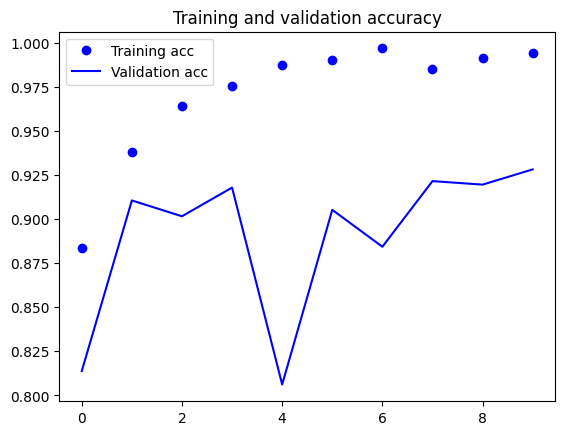

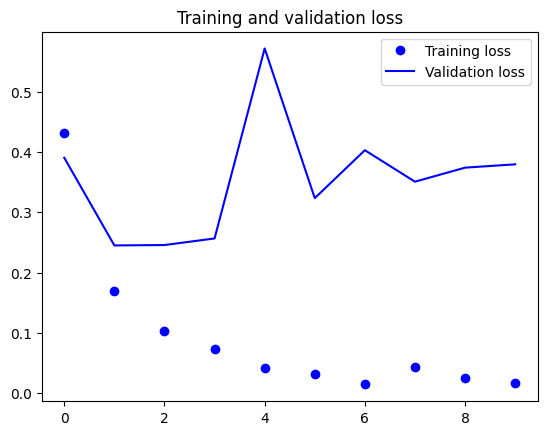

In [98]:
acc = histPreT.history['accuracy']
val_acc = histPreT.history['val_accuracy']
loss = histPreT.history['loss']
val_loss = histPreT.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [99]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [100]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [101]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhatPreT = modelPreT.predict(X)
    pre.update_state(y, yhatPreT)
    re.update_state(y, yhatPreT)
    acc.update_state(y, yhatPreT)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 211ms/step
Precision: 0.9473684430122375, Recall:0.9473684430122375, Accuracy: 0.9375
1/1 [==============================] - 0s 31ms/step
Precision: 0.9444444179534912, Recall:0.9444444179534912, Accuracy: 0.9375
1/1 [==============================] - 0s 31ms/step
Precision: 0.9622641801834106, Recall:0.9107142686843872, Accuracy: 0.9270833134651184
1/1 [==============================] - 0s 34ms/step
Precision: 0.9285714030265808, Recall:0.8904109597206116, Accuracy: 0.8984375
1/1 [==============================] - 0s 31ms/step
Precision: 0.9259259104728699, Recall:0.8928571343421936, Accuracy: 0.90625
1/1 [==============================] - 0s 30ms/step
Precision: 0.938144326210022, Recall:0.9009901285171509, Accuracy: 0.9166666865348816
1/1 [==============================] - 0s 32ms/step
Precision: 0.9122806787490845, Recall:0.904347836971283, Accuracy: 0.90625
1/1 [==============================] - 0s 31ms/step
Precision: 0.9166666865348816, 

In [ ]:
modelPreT.save(os.path.join('models','Pretrained_ad_class_medium40.h5'))

# Test unseen inages

In [111]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis/data'

In [112]:
os.chdir('..')

In [113]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis'

array([[[  8,   0, 155],
        [  8,   0, 155],
        [  8,   0, 155],
        ...,
        [  0,   1,  82],
        [  0,   1,  82],
        [  0,   1,  82]],

       [[  8,   0, 155],
        [  8,   0, 155],
        [  8,   0, 155],
        ...,
        [  0,   1,  82],
        [  0,   1,  82],
        [  0,   1,  82]],

       [[  7,   0, 157],
        [  7,   0, 157],
        [  7,   0, 157],
        ...,
        [  0,   1,  82],
        [  0,   1,  82],
        [  0,   1,  82]],

       ...,

       [[ 13,   0, 192],
        [ 13,   0, 192],
        [ 13,   0, 192],
        ...,
        [  7,   6, 140],
        [  7,   6, 140],
        [  5,   6, 134]],

       [[ 22,   1, 194],
        [ 22,   1, 194],
        [ 22,   1, 194],
        ...,
        [  6,   0, 143],
        [  6,   0, 143],
        [  4,   0, 137]],

       [[ 13,   0, 194],
        [ 13,   0, 194],
        [ 13,   0, 194],
        ...,
        [  3,   0, 110],
        [  2,   0, 109],
        [  4,   1, 110]]], dtype=uint8)
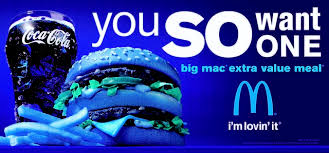

In [158]:
#imgPre= cv2.imread(os.path.join('unseen data','folder_5_main_12.jpg')) #
imgPre= cv2.imread(os.path.join('unseen data','mcdonalds.jpeg')) #
imgPre

In [126]:
import cv2

In [141]:
len(imgPre)

314

In [137]:
#plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
#plt.show()

In [159]:
resizePreT = tf.image.resize(imgPre, (256,256))
#resizePreT

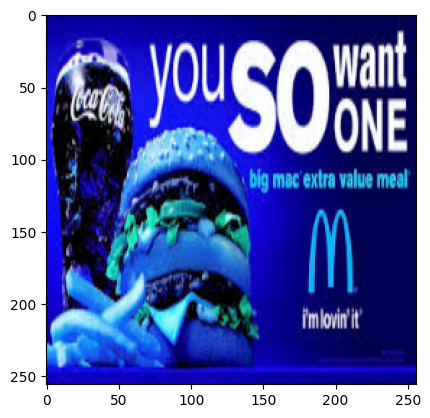

In [160]:
plt.imshow(resizePreT.numpy().astype(int))
plt.show()

In [155]:
#np.expand_dims(resizePreT,0).shape

(1, 256, 256, 3)

In [161]:
yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_newPreT

1/1 [==============================] - 0s 24ms/step


array([[3.3274e-07]], dtype=float32)

For the pretrained model the classes were inverted, so we have:

Simple Image = 1 <br>
Ad = 0

In [162]:
#class 1= simple img, class 0 = Ad

if yhat_newPreT > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


Our Model

In [168]:
yhat_loaded_model = loaded_model.predict(np.expand_dims(resizePreT/255, 0))#/ad_classifier_first_small_Model.keras
yhat_loaded_model

1/1 [==============================] - 0s 22ms/step


array([[1.02992135e-05]], dtype=float32)

In [170]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


Medium Model 40 (15000 images)

In [171]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis'

In [174]:
loaded_model40 = keras.saving.load_model(os.path.join('data','models',"ad_classifier_first_medium40_Model.keras"))
loaded_model40.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                        

In [175]:
yhat_loaded_model40 = loaded_model40.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_loaded_model40

1/1 [==============================] - 0s 138ms/step


array([[0.03246341]], dtype=float32)

In [176]:
#class 1= simple img, class 0 = Ad

if yhat_loaded_model40 > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad
